In [1]:
%load_ext autoreload
%matplotlib inline
execfile ("_ImportScript.py")
import time

1


In [2]:
import matplotlib.pyplot as plt

In [3]:
beatbox.You.create_original_Universe()

In [4]:
numreal = 100

for i in range(numreal):
    beatbox.You.initiate_simulated_universe(truncated_nmax = 15)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 an

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:597: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


In [5]:
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()


datamap = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)+beatbox.You.generate_one_realization_of_noise()
beatbox.You.all_simulated_universes[-1].ay_real = datamap
 

MOCK = 1
beatbox.You.solve_for_3D_potential(datamap.T , A=None, print_alpha=0)

0.00450801849365
total time is:
0.501989126205


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:431: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:494: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:440: RuntimeWarning: divide by zero encountered in power
  Power_Spectrum = PSnorm*10000*np.power((beatbox.Universe.k/kstar) ,(-3+(n_s-1)))


In [6]:
cov_frac = np.zeros((numreal,1))

for i in range(numreal):
    print i
    noise_realization = beatbox.You.generate_one_realization_of_noise()
    true_alms = beatbox.You.all_simulated_universes[i].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[i].ay)
    datamap =  true_alms + noise_realization
    beatbox.You.solve_for_3D_potential(datamap.T , A=1, print_alpha=0)
    
    We=beatbox.Universe()        
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes,We)
    beatbox.You.all_data_universes[i].fn = beatbox.You.reconstrunct_fn

    if i == 0:
            ordered_inds_largenmax = beatbox.You.all_simulated_universes[i].get_ordered_fn_indices()
            ordered_inds_smallnmax = beatbox.You.all_data_universes[i].get_ordered_fn_indices()
    min_n_mode = np.min((len(ordered_inds_largenmax), len(ordered_inds_smallnmax) )    )
    
    true_fns = beatbox.You.all_simulated_universes[i].fn[ordered_inds_largenmax[:min_n_mode]].reshape(-1,1)
    rec_fns = beatbox.You.all_data_universes[i].fn[ordered_inds_smallnmax[:min_n_mode]].reshape(-1,1)
    abs_diff = np.abs(true_fns - rec_fns)
    err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax[:min_n_mode]])
    diff_sigma = np.divide(abs_diff.reshape(-1,1) , err_sig.reshape(-1,1) ).reshape(-1,1)
    cov_frac[i,0] = np.double(np.sum(diff_sigma<=1)) / np.double(len(diff_sigma))
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/noise_" + str("%0.03d" % i) + ".txt", noise_realization)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_alm_" + str("%0.03d" % i) + ".txt", true_alms)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_fn_" + str("%0.03d" % i) + ".txt", true_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/rec_fn_" + str("%0.03d" % i) + ".txt", rec_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/abs_diff_" + str("%0.03d" % i) + ".txt", abs_diff)
print diff_sigma

0
0.00121903419495
time for loading is:
0.00899410247803
successfully loaded A from the disk.
total time is:
0.0114290714264
1
0.00074291229248
time for loading is:
0.0117909908295
successfully loaded A from the disk.
total time is:
0.0139038562775
2
0.000432014465332
time for loading is:
0.0079779624939
successfully loaded A from the disk.
total time is:
0.00980114936829
3
0.000570058822632
time for loading is:
0.00870513916016
successfully loaded A from the disk.
total time is:
0.0132119655609
4
0.000956058502197
time for loading is:
0.00916385650635
successfully loaded A from the disk.
total time is:
0.0133271217346
5
0.000617980957031
time for loading is:
0.00827217102051
successfully loaded A from the disk.
total time is:
0.0100860595703
6
0.000658988952637
time for loading is:
0.0108699798584
successfully loaded A from the disk.
total time is:
0.0129950046539
7
0.000433921813965
time for loading is:
0.00714993476868
successfully loaded A from the disk.
total time is:
0.0091691017

In [7]:
print cov_frac.shape
np.mean(cov_frac)
# print cov_frac


(100, 1)


0.67133286318758822

/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


ValueError: range parameter must be finite.

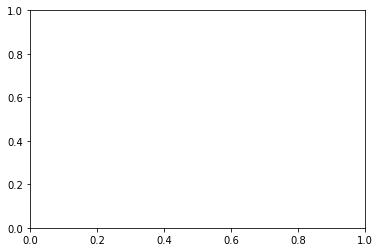

In [8]:
execfile ("_CalcEvidence.py")

In [8]:
print EvidenceVector

[  7.68702275e-29   1.74222680e-25   6.50096113e-26   4.00846299e-27
   7.53989744e-27   1.20827294e-30   2.37000323e-28   1.10191646e-27
   2.60390975e-26   1.02977057e-26]


-26.6414095015
3.44125872023e-26


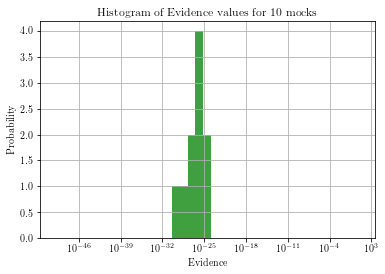

In [10]:
execfile ("_CalcEvidence.py")

-40.0062567343
1.60083551651e-39


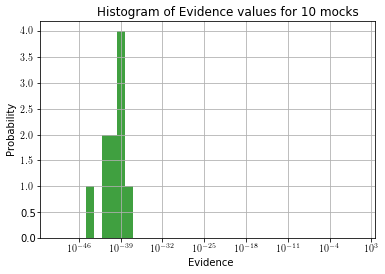

In [7]:
execfile ("_CalcEvidence.py")

-39.9328732344
2.57623356758e-39


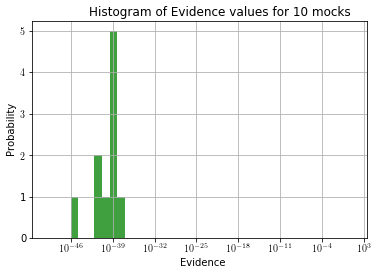

In [8]:
execfile ("_CalcEvidence.py")

-40.7589982474
5.07877441395e-39


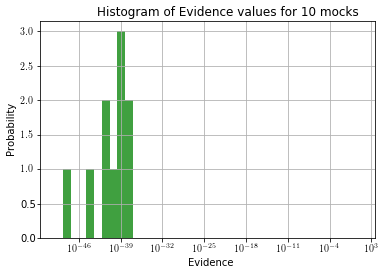

In [7]:
execfile ("_CalcEvidence.py")

-inf
3.00235364048e-175


/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10


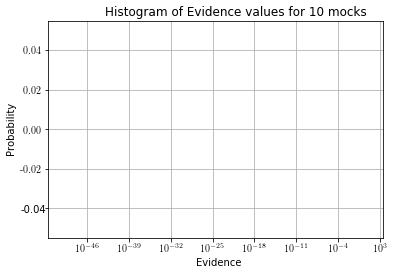

In [7]:
execfile ("_CalcEvidence.py")

In [8]:
5.07877441395e-39/1.3273048694e-39

3.8263812113081666

In [ ]:
np.save( "/Users/LaurencePeanuts/Dropbox/KleineBar_KlaineTiger/MUSIC/2018/C_yy_lmax7.npy", beatbox.You.C_yy)
np.save( "/Users/LaurencePeanuts/Dropbox/KleineBar_KlaineTiger/MUSIC/2018/R_lmax7_nmax15.npy", beatbox.You.R_real)

In [ ]:
np.unique(beatbox.You.all_data_universes[0].kfilter)

In [ ]:
# Check calculated k covariance from samples, against prior covariance matrix
numCp = np.zeros(len(beatbox.You.all_simulated_universes[0].fn))
for j in range(len(beatbox.You.all_simulated_universes[0].fn)):
    fns = [beatbox.You.all_simulated_universes[i].fn[j] for i in range(numreal)]
    numCp[j] = np.std(fns) #1./(np.std(fns)**2)

plt.plot(numCp)
plt.plot(1/np.sqrt(np.diag(beatbox.You.inv_Cf)),'--')

In [ ]:
plt.plot(beatbox.You.all_simulated_universes[0].fn[ordered_inds_largenmax],' +')
err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax])
eb2 = plt.errorbar(np.arange(0,len(beatbox.You.all_data_universes[0].fn)).reshape(-1,1) , beatbox.You.all_data_universes[0].fn[ordered_inds_smallnmax].reshape(-1,1) , yerr = err_sig.reshape(-1,1),ls=' ')
plt.axis([1 ,34, -20, 20])

In [ ]:
# test that the noise covariance matrix is correct
datamap = np.zeros((numreal,24))

for i in range(numreal):
    datamap[i,:] = beatbox.You.generate_one_realization_of_noise()



In [ ]:
datamap.shape

In [ ]:
plt.subplot(1,2,1)
plt.imshow(np.cov(datamap.T))
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(np.linalg.inv(beatbox.You.inv_Cyy))
plt.colorbar()

In [13]:
print 10**-102.045412774

9.00714648877e-103
